#**Chess Board Detection** ♟

###Download the data from Roboflow

In [1]:
!pip -q install ultralytics roboflow opencv-python

from roboflow import Roboflow
rf = Roboflow(api_key="ftf5QBveFnG8Nr6CiwsB")
project = rf.workspace("chessboard-corner-detection-3b5bs").project("chessboard-detection-yqcnu")
version = project.version(3)
dataset = version.download("yolov11")
DATA_DIR  = dataset.location
DATA_YAML = f"{DATA_DIR}/data.yaml"
print("DATA_DIR:", DATA_DIR)
print("DATA_YAML:", DATA_YAML)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 132.1 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to chessboard-detection-3 in yolov11:: 100%|██████████| 47972/47972 [00:07<00:00, 6330.07it/s]


DATA_DIR: /content/chessboard-detection-3
DATA_YAML: /content/chessboard-detection-3/data.yaml


###Train

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11x.pt") # This is a very large model, so it will be slow

run_name = "corners_11x_640_v2" # Note: Changed to v2
project_path = "/content/drive/MyDrive/Courses/פרוייקט/colab/runs"

results = model.train(
    # --- Core Settings ---
    data=DATA_YAML,
    imgsz=640,
    epochs=200,
    device=0,
    workers=8,
    project=project_path,
    name=run_name,

    # --- Stability Fixes (The most important part) ---
    lr0=0.001,      # BETTER: A safe and effective learning rate for AdamW.
    batch=16,

    # --- Kept Good Settings ---
    optimizer="adamw",
    cache="ram",
    cls=0.2,        # GOOD: Keep de-emphasizing the 1-class classification

    # --- Other Good-to-Haves ---
    amp=True,
    patience=50,      # Early stopping (40-50 is fine)
    close_mosaic=10,  # Turn off mosaic for the last 10 epochs (default)
    plots=True,
    save_period=25
)

print("✅ Training complete. Best weights saved under:")
print(f"{project_path}/{run_name}/weights/best.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=ram, cfg=None, classes=None, close_mosaic=10, cls=0.2, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/chessboard-detection-3/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=F

continue training

In [2]:
from ultralytics import YOLO

# continue training but make sure were near the convergence.
# increased lr and lowered patience for faster training and finish because were out of compute units.
model = YOLO("/content/drive/MyDrive/Courses/פרוייקט/colab/runs/corners_11x_640_v2/weights/last.pt")

results = model.train(
    data=DATA_YAML,
    resume=True,
    patience=7,
    lr0=0.003,

    project="/content/drive/MyDrive/Courses/פרוייקט/colab/runs",
    name="corners_11x_640_v2"
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=ram, cfg=None, classes=None, close_mosaic=10, cls=0.2, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/chessboard-detection-3/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=F

KeyboardInterrupt: 

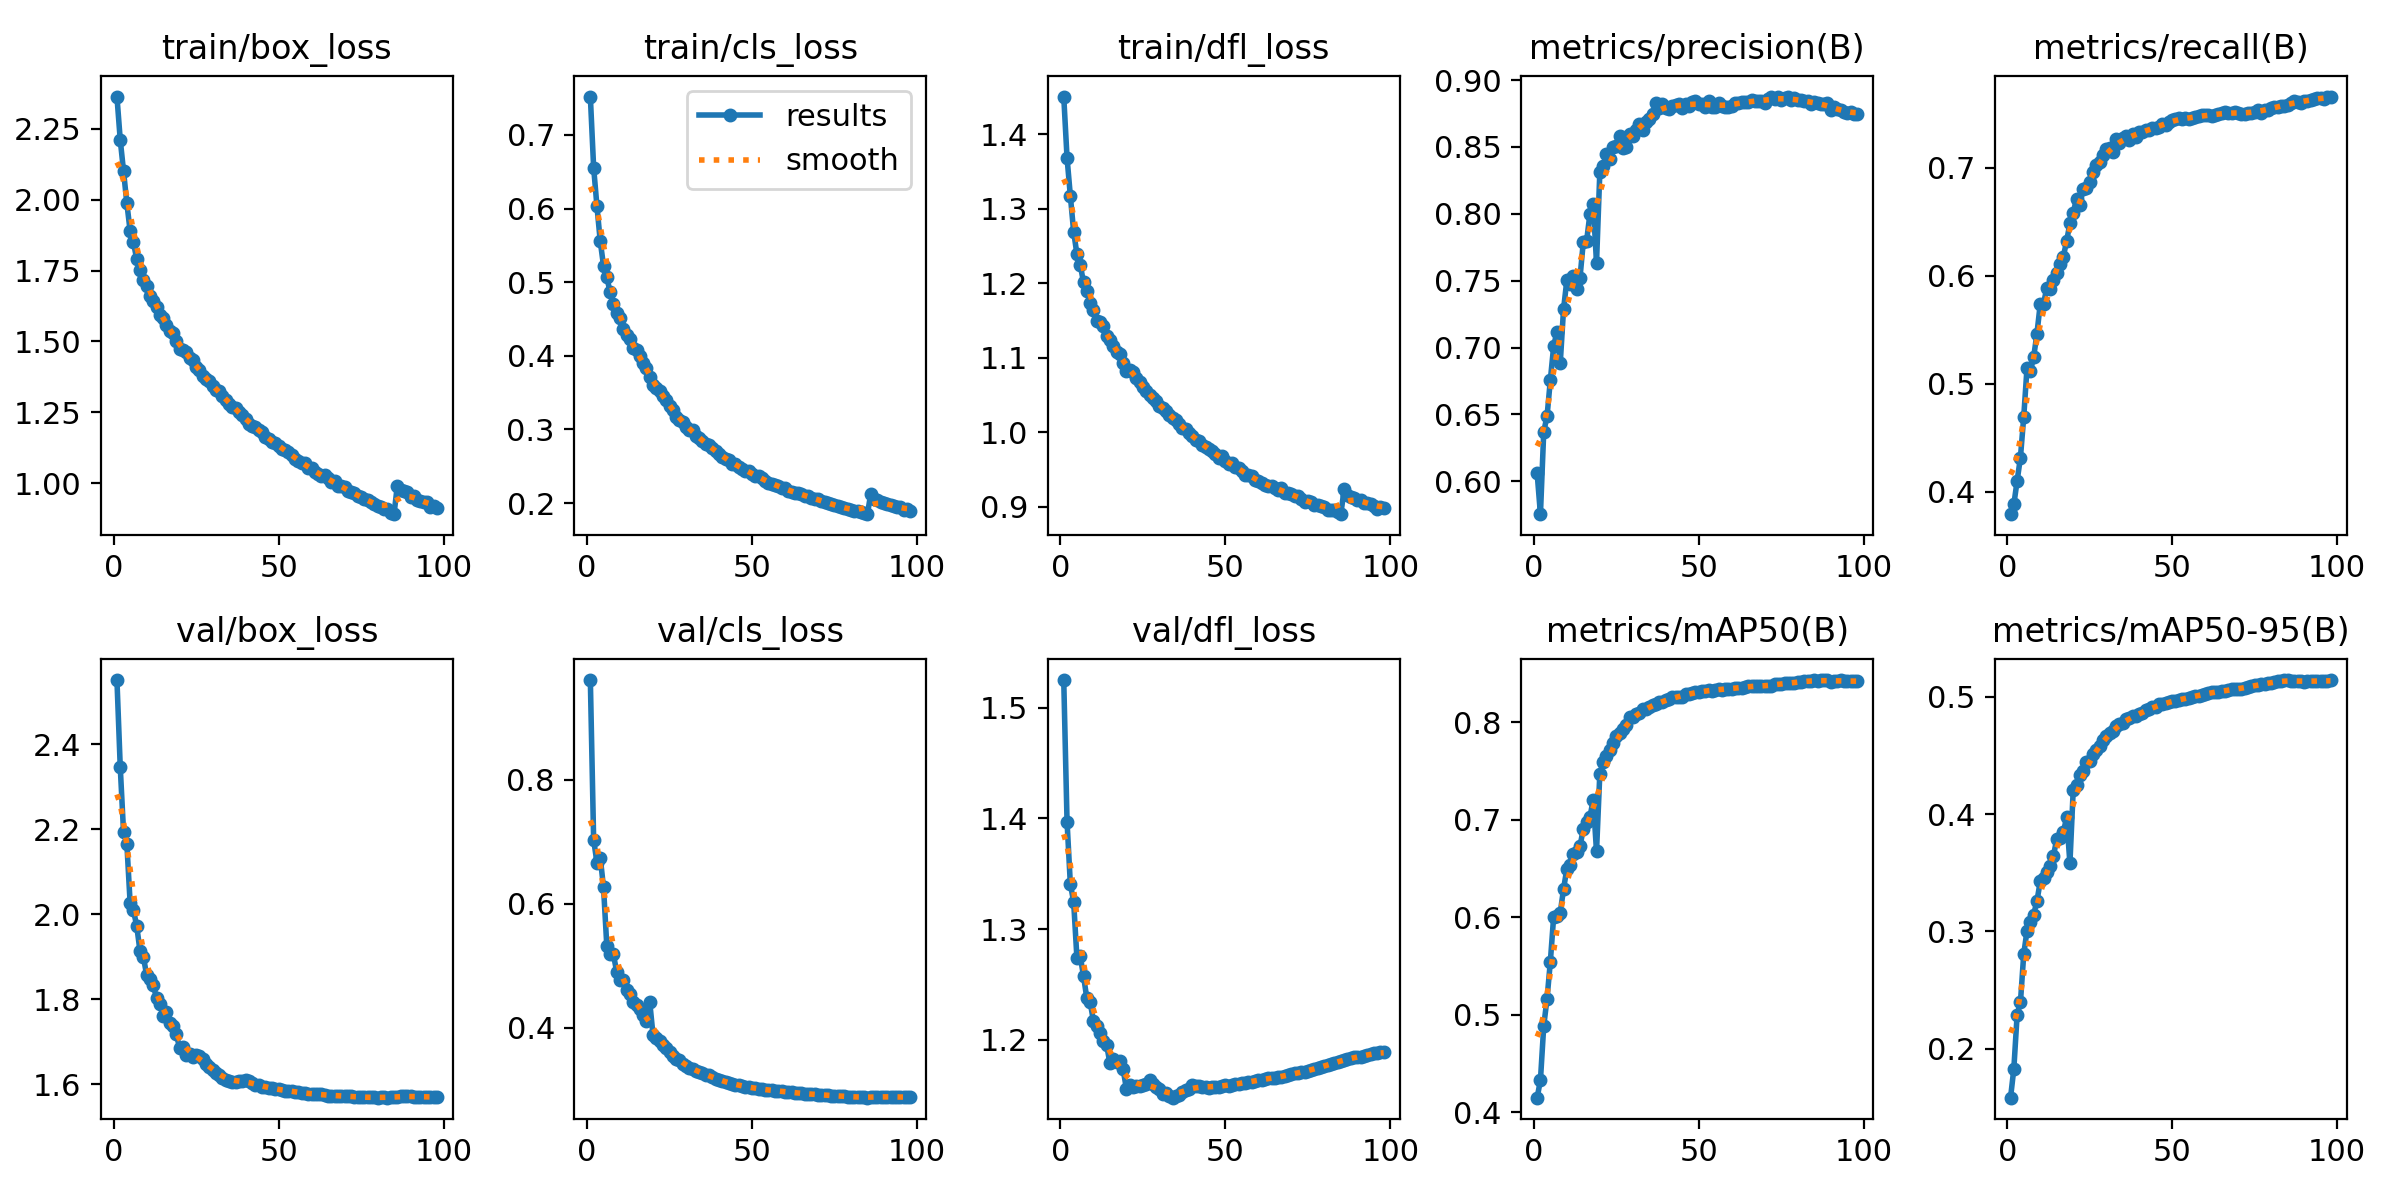

In [4]:
from ultralytics.utils.plotting import plot_results
from IPython.display import Image, display

# Path to your results file
results_file = "/content/drive/MyDrive/Courses/פרוייקט/colab/runs/corners_11x_640_v2/results.csv"

# 1. Generate the plot
# This saves a new image 'results.png' in that same folder
plot_results(results_file)

# 2. Display the generated image
display(Image(filename="/content/drive/MyDrive/Courses/פרוייקט/colab/runs/corners_11x_640_v2/results.png"))

###Evaluate on test

In [18]:
import os
from IPython.display import Image, display
from ultralytics import YOLO

# 1. LOAD YOUR MODEL
model = YOLO("/content/drive/MyDrive/Courses/פרוייקט/colab/runs/corners_11x_640_v2/weights/best.pt")

# 2. RUN VALIDATION ON TEST SET
# (Make sure DATA_YAML is set)
results = model.val(data=DATA_YAML, split='test')

# 3. ACCESS AND PRINT METRICS (The Fix)
print("--- Final Model Metrics ---")

# ⚠️ FIX: Use 'mp' and 'mr' for mean precision and mean recall
print(f"Mean Precision (P): {results.box.mp: .4f}")
print(f"Mean Recall (R):    {results.box.mr: .4f}")
print(f"mAP50:              {results.box.map50: .4f}")
print(f"mAP50-95:           {results.box.map: .4f}")

Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11x summary (fused): 190 layers, 56,828,179 parameters, 0 gradients, 194.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1619.0±532.0 MB/s, size: 69.0 KB)
val: Scanning /content/chessboard-detection-3/test/labels.cache... 986 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 986/986 1.6Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 62/62 2.2it/s 27.9s
                   all        986       3527      0.878      0.763      0.844      0.516
Speed: 0.9ms preprocess, 23.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /content/runs/detect/val10
--- Final Model Metrics ---
Mean Precision (P):  0.8777
Mean Recall (R):     0.7627
mAP50:               0.8445
mAP50-95:            0.5164



--- Running Prediction on a Test Image ---

image 1/1 /content/chessboard-detection-3/test/images/0_jpg.rf.8ae2b5e52fe87049f6c25469f6add4ed.jpg: 640x640 4 chess-table-cornerss, 20.3ms
Speed: 2.2ms preprocess, 20.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict4
Displaying prediction for: /content/runs/detect/predict4/0_jpg.rf.8ae2b5e52fe87049f6c25469f6add4ed.jpg


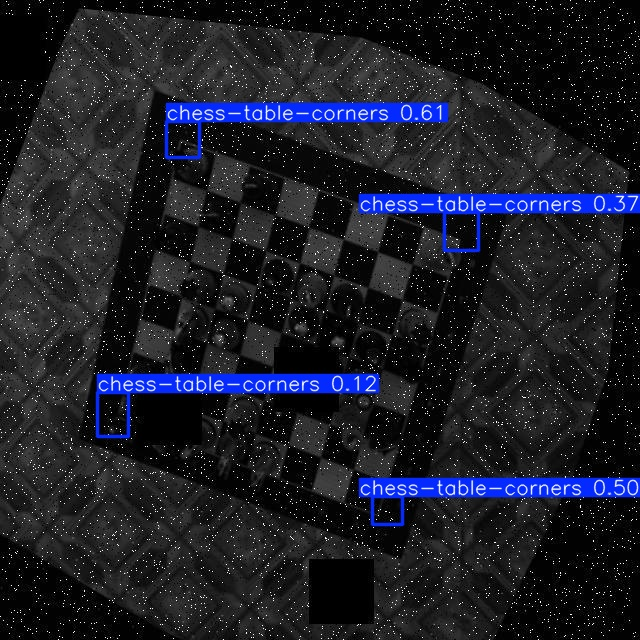

In [21]:
print("\n--- Running Prediction on a Test Image ---")

# --- 4. SET YOUR IMAGE PATH ---
# ⚠️ IMPORTANT: You must change this to a real image path from your test set!
# I'm guessing a path, please update it.
IMAGE_PATH = "/content/chessboard-detection-3/test/images/0_jpg.rf.8ae2b5e52fe87049f6c25469f6add4ed.jpg"
# ---------------------------------

# Check if the file exists before predicting
if not os.path.exists(IMAGE_PATH):
    print(f"Error: Image not found at path: {IMAGE_PATH}")
    print("Please update the IMAGE_PATH variable to a correct file path.")
else:
    # 5. Run prediction
    predict_results = model.predict(
        source=IMAGE_PATH,
        save=True,
        conf=0.1,    # The confidence threshold you set
        iou=0.1      # <-- NEW: Set a stricter IoU threshold (default is 0.7)
    )

    # 6. Get the path of the saved image
    base_filename = os.path.basename(IMAGE_PATH)
    save_directory = predict_results[0].save_dir
    saved_image_path = os.path.join(save_directory, base_filename)

    # 7. Display the image in Colab
    print(f"Displaying prediction for: {saved_image_path}")
    display(Image(filename=saved_image_path))